## Variable Labeling Ratio with blunt tip.

In [1]:
from pathlib import Path
import json
import sys
sys.path.append("../../../../")

import anamic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
from tqdm.auto import tqdm

data_dir = Path('/home/hadim/Drive/Data/Postdoc/Fake Microtubules/anamic/accuracy')

experiment_name = 'labeling_ratio_with_blunt_tip'
experiment_dir = data_dir / experiment_name

In [12]:
data = pd.read_csv(experiment_dir / "analysis.csv")

# Compute fitted tip error vs `true_end`.
data['error'] = np.sqrt(np.sum(data[['x', 'y']].values - data[['tip_end_x', 'tip_end_y']].values, axis=1)**2)

data.head()

,parameter,image_path,x,y,tip_start_x,tip_start_y,tip_end_x,tip_end_y,sigma,error
0,0.1,labeling_ratio-0.1/microtubule_0063.tif,40.164139,63.455267,55.846154,40.769231,40.615385,63.000000,87.668892,0.004022
1,0.1,labeling_ratio-0.1/microtubule_0041.tif,59.962895,40.027341,40.615385,60.000000,59.230769,40.692308,82.364275,0.067159
2,0.1,labeling_ratio-0.1/microtubule_0052.tif,40.809449,68.059147,44.000000,40.384615,40.538462,67.000000,87.851417,1.330135
3,0.1,labeling_ratio-0.1/microtubule_0092.tif,40.421404,40.354946,55.000000,63.000000,40.538462,40.307692,75.918968,0.069804
4,0.1,labeling_ratio-0.1/microtubule_0053.tif,40.690908,40.224495,54.000000,64.000000,40.538462,40.538462,97.461605,0.161521


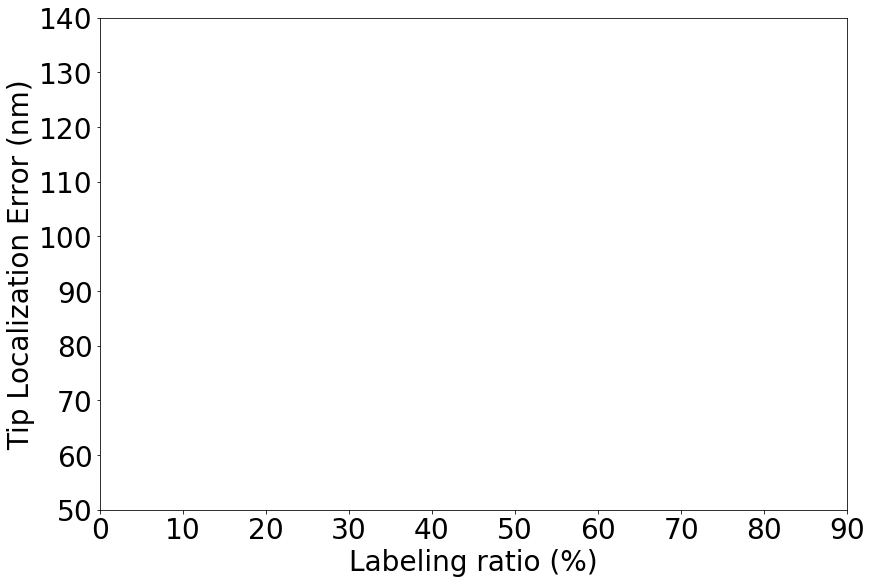

In [16]:
# Plot tip localization error.

x_feature = 'parameter'
y_feature = 'error'

font_size = 28
color = "#2a77b4"

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

x = data[x_feature] * 100
y = data[y_feature]

ax.scatter(x, y, alpha=0.4, marker='x')

gb = data.groupby(x_feature)
average = gb.mean()

x_average = average.index
y_average = average[y_feature]
ax.errorbar(x_average, y_average, yerr=gb.sem()[y_feature], fmt='o', color=color, elinewidth=4, markersize=14)

ax.set_xlabel("Labeling ratio (%)", fontsize=font_size)
ax.set_ylabel("Tip Localization Error (nm)", fontsize=font_size)

ax.set_xticks(np.arange(0, 100, 10))

ax.set_ylim(50, 140)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
fig.savefig(experiment_dir / "error.png")

In [25]:
# Plot sigma of the fitted tips.

x_feature = 'parameter'
y_feature = 'sigma'

font_size = 28
color = "#2a77b4"

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

x = data[x_feature] * 100
y = data[y_feature]

ax.scatter(x, y, alpha=0.4, marker='x')

gb = data.groupby(x_feature)
average = gb.mean()

x_average = average.index
y_average = average[y_feature]
ax.errorbar(x_average, y_average, yerr=gb.sem()[y_feature], fmt='o', color=color, elinewidth=4, markersize=14)

ax.set_xlabel("Labeling ratio (%)", fontsize=font_size)
ax.set_ylabel("Sigma of the fitted tips (nm)", fontsize=font_size)

ax.set_xticks(np.arange(0, 100, 10))

#ax.set_ylim(50, 140)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(font_size)
    
fig.savefig(experiment_dir / "sigma.png")